In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_raw_path = '../../data/raw/'
data_raw_name = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data_filepath = os.path.join(data_raw_path, data_raw_name)

In [ ]:
df = pd.read_csv(data_filepath)
display(df.head())
display(df.shape)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


(2111, 17)

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
# Split features by type
categ_features = []
num_features = []

for feature in df.columns.to_list():
    series_feat = df[feature]
    if series_feat.dtype == 'object':
        categ_features.append(feature)
    else:
        num_features.append(feature)

In [9]:
for feature in categ_features:
    series_feat = df[feature]
    if series_feat.dtype == 'object':
        unique = series_feat.unique()
        print('Feature: {:.<30} no.: {:.<5} values: {}'.format(feature, len(unique), unique))

Feature: Gender........................ no.: 2.... values: ['Female' 'Male']
Feature: family_history_with_overweight no.: 2.... values: ['yes' 'no']
Feature: FAVC.......................... no.: 2.... values: ['no' 'yes']
Feature: CAEC.......................... no.: 4.... values: ['Sometimes' 'Frequently' 'Always' 'no']
Feature: SMOKE......................... no.: 2.... values: ['no' 'yes']
Feature: SCC........................... no.: 2.... values: ['no' 'yes']
Feature: CALC.......................... no.: 4.... values: ['no' 'Sometimes' 'Frequently' 'Always']
Feature: MTRANS........................ no.: 5.... values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Feature: NObeyesdad.................... no.: 7.... values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


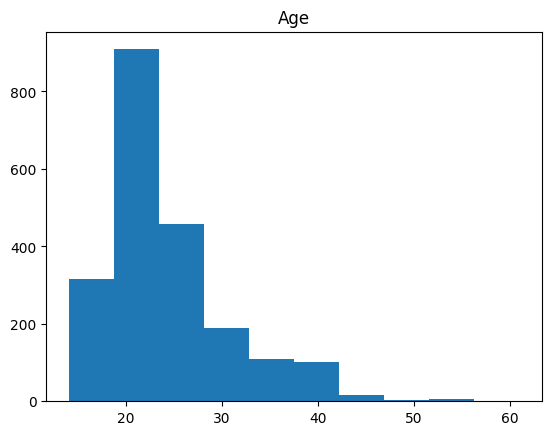

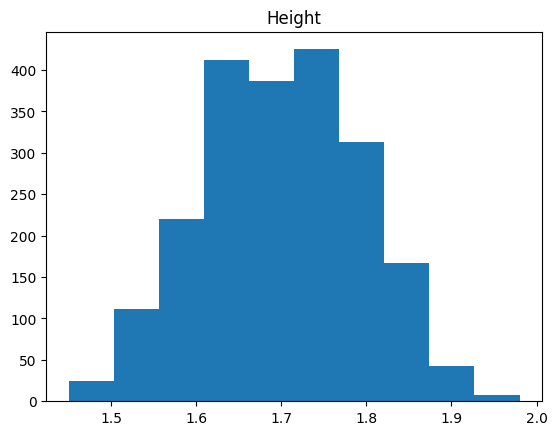

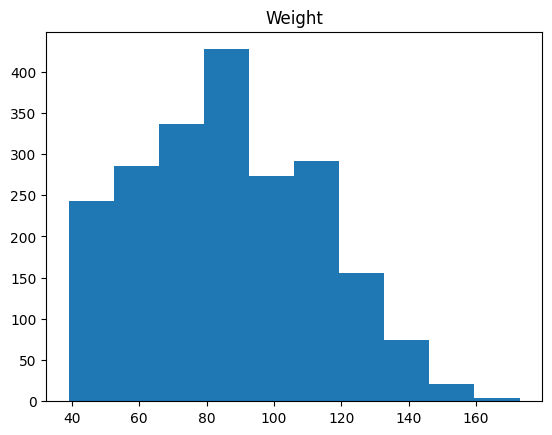

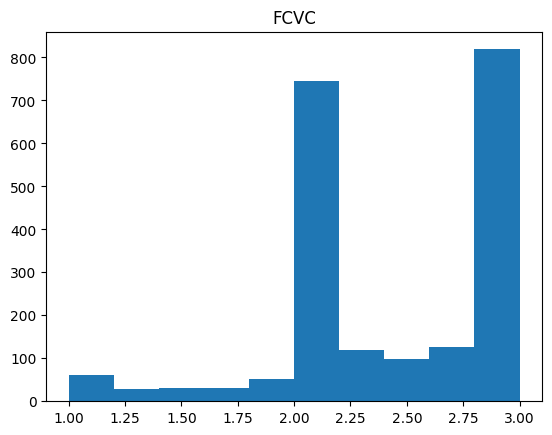

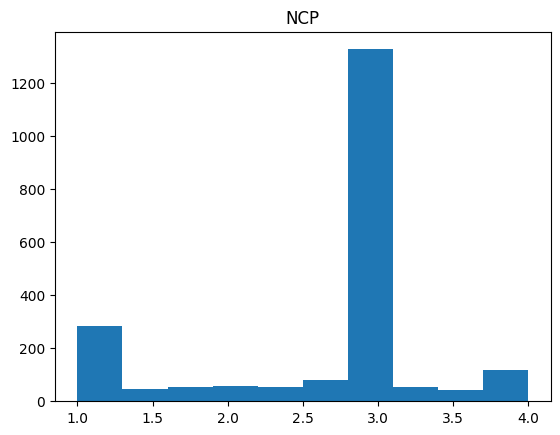

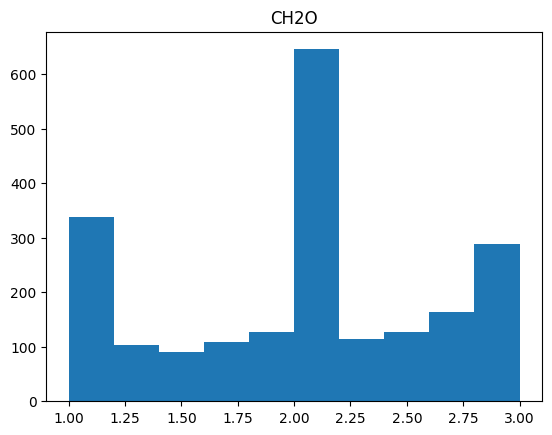

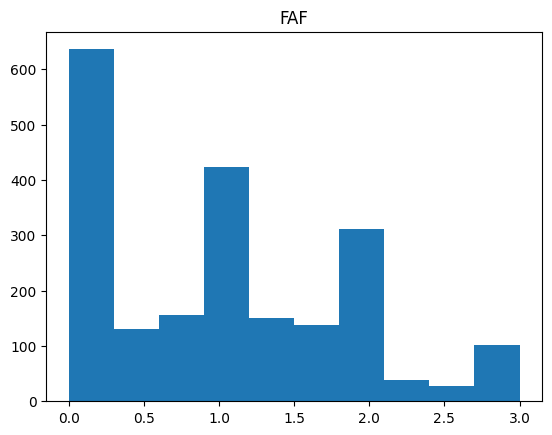

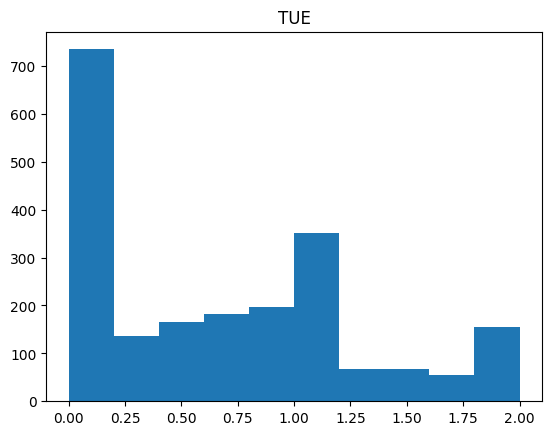

In [10]:
# distribution of num features

for feature in num_features:
    fig, ax = plt.subplots()
    ax.hist(df[feature])
    plt.title(feature)

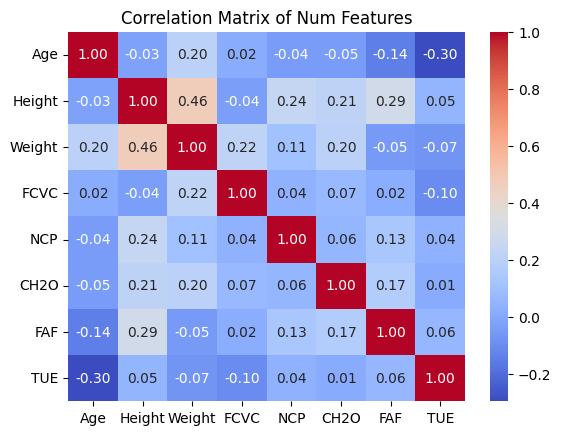

In [11]:
# correlation among numerical features
fig, ax = plt.subplots()
m = df[num_features].corr().to_numpy()
sns.heatmap(m, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=num_features, yticklabels=num_features)
plt.title('Correlation Matrix of Num Features')
plt.show();

{'Male': 1068, 'Female': 1043}
{'yes': 1726, 'no': 385}
{'yes': 1866, 'no': 245}
{'Sometimes': 1765, 'Frequently': 242, 'Always': 53, 'no': 51}
{'no': 2067, 'yes': 44}
{'no': 2015, 'yes': 96}
{'Sometimes': 1401, 'no': 639, 'Frequently': 70, 'Always': 1}
{'Public_Transportation': 1580, 'Automobile': 457, 'Walking': 56, 'Motorbike': 11, 'Bike': 7}
{'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272}


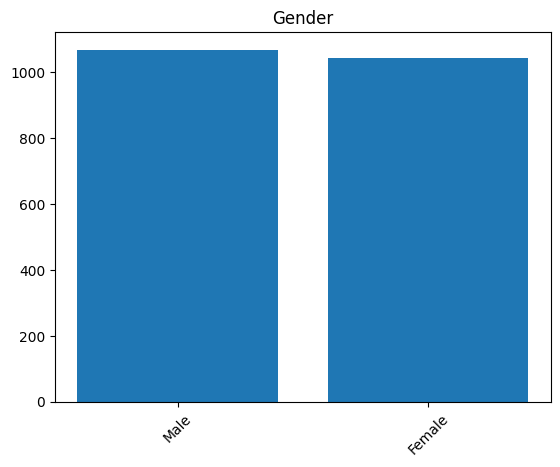

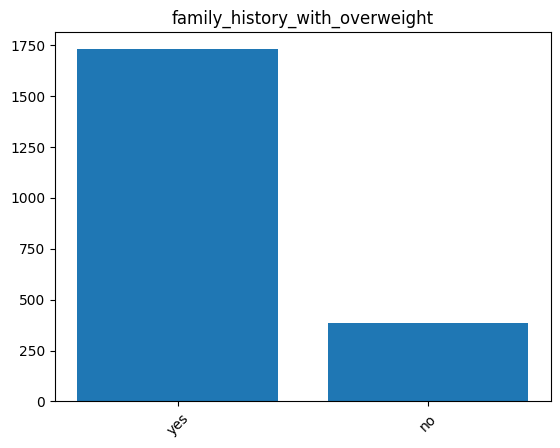

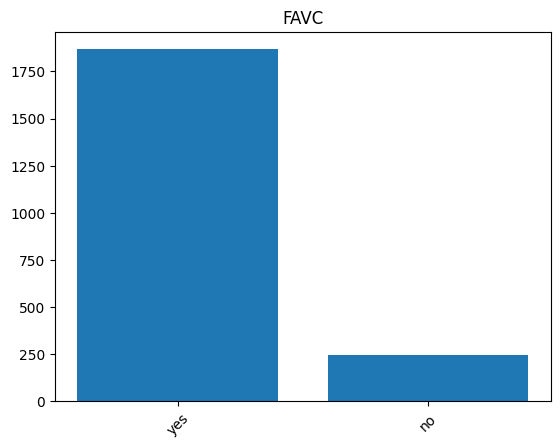

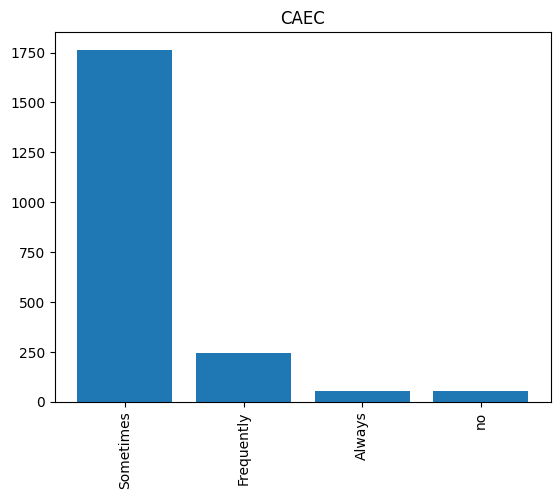

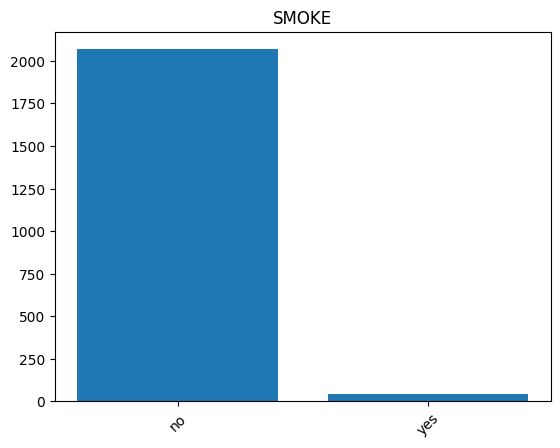

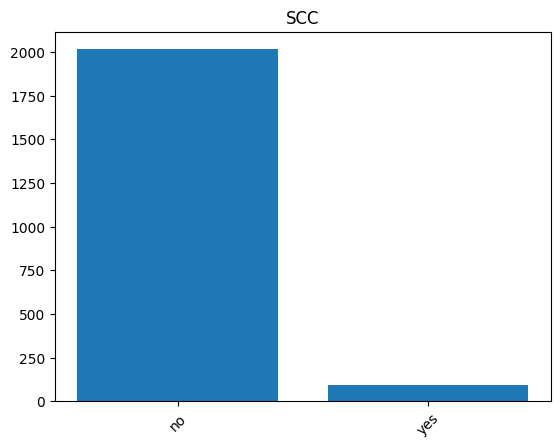

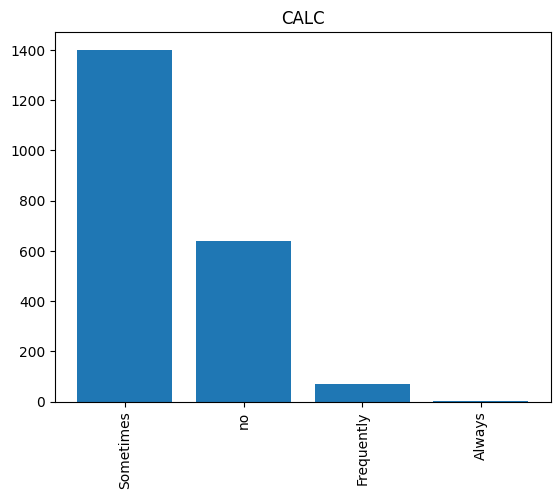

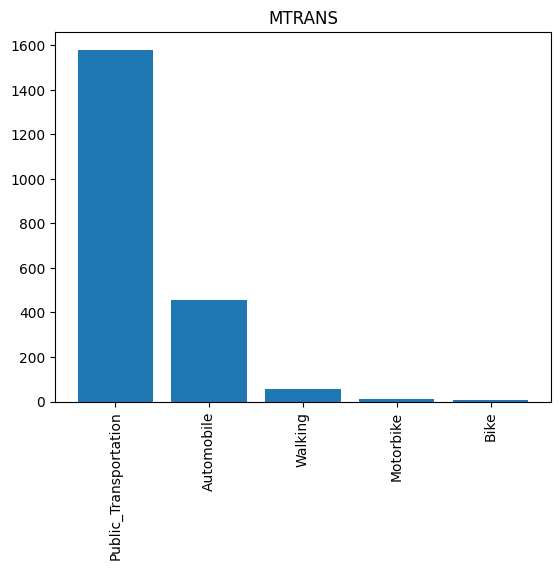

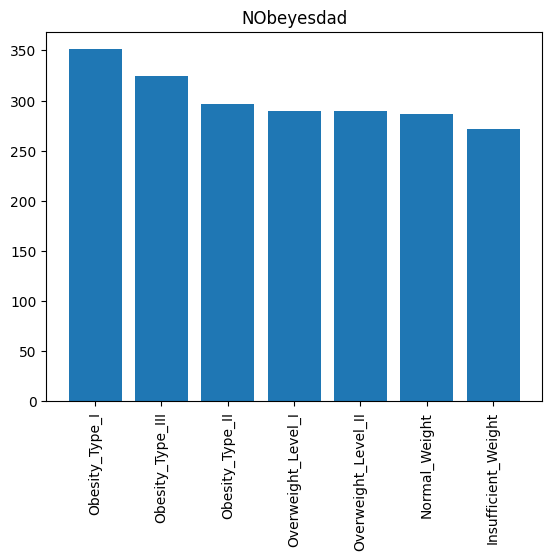

In [24]:
# bar plots for categorical data
bar_features = df[categ_features].value_counts()

for feature in categ_features:
    counts = df[feature].value_counts().to_dict()
    print(counts)
    fig, ax = plt.subplots()
    ax.bar(counts.keys(), counts.values())
    if len(counts.keys())>3:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.title(feature)

    

## Data processing
- Scale `Age`, `Height`, and `Weight`, options: scikit learn minmax scaler within the range `(1, 5)`
- One-hot-encode Gender, family_history_with_overweight, CALC, MTRANS
- Encode categorical features
- `Age` can be grouped into categories, e.g., group_a < 30 years
-  
